# Unit Commitment
The unit commitment problem (UC) in electrical power production is a large family of mathematical optimization problems where the production of a set of electrical generators is coordinated in order to achieve some common target, usually either matching the energy demand at minimum cost or maximizing revenue from electricity production. This is necessary because it is difficult to store electrical energy on a scale comparable with normal consumption; hence, each (substantial) variation in the consumption must be matched by a corresponding variation of the production. 

Source: [Wikipedia](https://en.wikipedia.org/wiki/Unit_commitment_problem_in_electrical_power_production)

In [47]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from UC import unit_commitment
np.set_printoptions(suppress=True)

In [43]:
# Set generator cost functions and generation limits in "data"

data = np.array([
    #a           b          c       Pmin     Pmax
    [0.005,      17.5,      20,     0,       620],
    [0.009,      21.3,      11,     0,       650],
    [0.0045,     17,        15,     0,       400],
    [0.006,      14,         8,     0,       380]])

# Set load sequence (time & power demand) in "sequence"

sequence = np.array([
    # Time   Demand[MW]
    [1,     1365],
    [2,     1305],
    [3,     1245],
    [4,     1185],
    [5,     1125],
    [6,     1065],
    [7,     1005],
    [8,     945],
    [9,     885],
    [10,    825]])

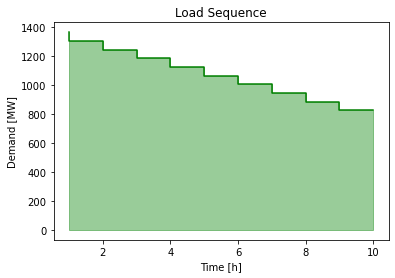

In [44]:
# Plot load sequence (optional)

t = sequence[:, 0]
y = sequence[:, 1]
plt.step(t, y, color="green")
plt.fill_between(t, y, step="pre", alpha=0.4, color="green")
plt.title("Load Sequence")
plt.xlabel("Time [h]")
plt.ylabel("Demand [MW]")
plt.show()

In [45]:
HOURS = sequence.shape[0]
NGEN = data.shape[0]
bestConfig = np.zeros((HOURS, 2*NGEN+1))
record = dict()

# Get lowest cost for all ELD combinations

for i in range(HOURS):
    unitState, Pmatrix, Cmatrix, record[i+1] = unit_commitment(data, sequence[i, 1])
    Cmatrix[Cmatrix==0] = np.nan
    CminIndex = np.nanargmin(Cmatrix)
    bestConfig[i,:] = np.hstack((unitState[CminIndex], Pmatrix[CminIndex], Cmatrix[CminIndex]))

unit = [f"U{i+1}" for i in range(NGEN)]
power = [f"P{i+1}" for i in range(NGEN)]
    
# Create DataFrame for better visualization

loadseq = pd.DataFrame(
    np.concatenate([sequence, bestConfig[:, :NGEN], bestConfig[:, NGEN:-1],bestConfig[:, -1:]], axis=1),
    columns = ["Time", "Load", *unit, *power, "Cost"])
loadseq[["Time", *unit]] = loadseq[["Time", *unit]].astype("int")

pd.options.display.float_format = '{:,.2f}'.format

# Print unit commitment for every hour 

print("Optimal Load Sequence:")
display(loadseq)

print(f"TOTAL COST FOR OPTIMAL LOAD SEQUENCE: ${np.sum(loadseq['Cost'])}")

Optimal Load Sequence:


,Time,Load,U1,U2,U3,U4,P1,P2,P3,P4,Cost
0,1,"1,365.00",1,1,1,1,511.79,73.21,400.00,380.00,"25,633.98"
1,2,"1,305.00",1,1,1,1,473.21,51.79,400.00,380.00,"24,288.48"
2,3,"1,245.00",1,1,1,1,434.64,30.36,400.00,380.00,"22,966.12"
3,4,"1,185.00",1,0,1,1,405.00,0.00,400.00,380.00,"21,657.02"
4,5,"1,125.00",1,0,1,1,345.00,0.00,400.00,380.00,"20,382.02"
5,6,"1,065.00",1,0,1,1,298.16,0.00,386.84,380.00,"19,141.38"
6,7,"1,005.00",1,0,1,1,269.74,0.00,355.26,380.00,"17,921.01"
7,8,945.00,1,0,1,1,241.32,0.00,323.68,380.00,"16,717.70"
8,9,885.00,1,0,1,1,212.89,0.00,292.11,380.00,"15,531.43"
9,10,825.00,1,0,1,1,184.47,0.00,260.53,380.00,"14,362.22"


TOTAL COST FOR OPTIMAL LOAD SEQUENCE: $198601.37719766202


### Record for every hour

In [46]:
# If you wish to see ELD for every hour, you can access them through "record[hour]"
# For example record[5] shows the 16 combinations of generators with their respective power and cost.
# Below is shown how to display all records but only the feasible ones.

for i in record:
    print(f"Time: {sequence[i-1,0]} | Load: {sequence[i-1,1]}")
    display(record[i][record[i]["Feasible"]==1])
    
# Lowest cost for Time 1 is equal to $29280.92, for Time 2 is $24288.48 and so on, which are the same for the Optimal Load Sequence in the previous cell.

Time: 1 | Load: 1365


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
7,0,1,1,1,0.00,"1,430.00",1,0.00,585.00,400.00,380.00,"29,280.92"
11,1,0,1,1,0.00,"1,400.00",1,585.00,0.00,400.00,380.00,"25,698.02"
13,1,1,0,1,0.00,"1,650.00",1,620.00,365.00,0.00,380.00,"27,970.92"
14,1,1,1,0,0.00,"1,670.00",1,620.00,345.00,400.00,0.00,"28,757.72"
15,1,1,1,1,0.00,"2,050.00",1,511.79,73.21,400.00,380.00,"25,633.98"


Time: 2 | Load: 1305


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
7,0,1,1,1,0.00,"1,430.00",1,0.00,525.00,400.00,380.00,"27,403.52"
11,1,0,1,1,0.00,"1,400.00",1,525.00,0.00,400.00,380.00,"24,315.02"
13,1,1,0,1,0.00,"1,650.00",1,620.00,305.00,0.00,380.00,"26,331.12"
14,1,1,1,0,0.00,"1,670.00",1,620.00,285.00,400.00,0.00,"27,139.52"
15,1,1,1,1,0.00,"2,050.00",1,473.21,51.79,400.00,380.00,"24,288.48"


Time: 3 | Load: 1245


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
7,0,1,1,1,0.00,"1,430.00",1,0.00,465.00,400.00,380.00,"25,590.92"
11,1,0,1,1,0.00,"1,400.00",1,465.00,0.00,400.00,380.00,"22,968.02"
12,1,1,0,0,0.00,"1,270.00",1,620.00,625.00,0.00,0.00,"29,631.12"
13,1,1,0,1,0.00,"1,650.00",1,620.00,245.00,0.00,380.00,"24,756.12"
14,1,1,1,0,0.00,"1,670.00",1,620.00,225.00,400.00,0.00,"25,586.12"
15,1,1,1,1,0.00,"2,050.00",1,434.64,30.36,400.00,380.00,"22,966.12"


Time: 4 | Load: 1185


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
7,0,1,1,1,0.00,"1,430.00",1,0.00,405.00,400.00,380.00,"23,843.12"
11,1,0,1,1,0.00,"1,400.00",1,405.00,0.00,400.00,380.00,"21,657.02"
12,1,1,0,0,0.00,"1,270.00",1,620.00,565.00,0.00,0.00,"27,710.52"
13,1,1,0,1,0.00,"1,650.00",1,620.00,185.00,0.00,380.00,"23,245.92"
14,1,1,1,0,0.00,"1,670.00",1,620.00,165.00,400.00,0.00,"24,097.52"
15,1,1,1,1,0.00,"2,050.00",1,396.07,8.93,400.00,380.00,"21,666.91"


Time: 5 | Load: 1125


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
7,0,1,1,1,0.00,"1,430.00",1,0.00,345.00,400.00,380.00,"22,160.12"
11,1,0,1,1,0.00,"1,400.00",1,345.00,0.00,400.00,380.00,"20,382.02"
12,1,1,0,0,0.00,"1,270.00",1,620.00,505.00,0.00,0.00,"25,854.72"
13,1,1,0,1,0.00,"1,650.00",1,614.64,130.36,0.00,380.00,"21,800.12"
14,1,1,1,0,0.00,"1,670.00",1,601.79,123.21,400.00,0.00,"22,669.08"
15,1,1,1,1,0.00,"2,050.00",1,345.00,0.00,400.00,380.00,"20,393.03"


Time: 6 | Load: 1065


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
7,0,1,1,1,0.00,"1,430.00",1,0.00,285.00,400.00,380.00,"20,541.92"
11,1,0,1,1,0.00,"1,400.00",1,298.16,0.00,386.84,380.00,"19,141.38"
12,1,1,0,0,0.00,"1,270.00",1,620.00,445.00,0.00,0.00,"24,063.72"
13,1,1,0,1,0.00,"1,650.00",1,576.07,108.93,0.00,380.00,"20,392.91"
14,1,1,1,0,0.00,"1,670.00",1,563.21,101.79,400.00,0.00,"21,269.58"
15,1,1,1,1,0.00,"2,050.00",1,298.16,0.00,386.84,380.00,"19,152.38"


Time: 7 | Load: 1005


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
5,0,1,0,1,0.00,"1,030.00",1,0.00,625.00,0.00,380.00,"23,033.52"
6,0,1,1,0,0.00,"1,050.00",1,0.00,605.00,400.00,0.00,"23,726.72"
7,0,1,1,1,0.00,"1,430.00",1,0.00,225.00,400.00,380.00,"18,988.52"
10,1,0,1,0,0.00,"1,020.00",1,605.00,0.00,400.00,0.00,"19,972.62"
11,1,0,1,1,0.00,"1,400.00",1,269.74,0.00,355.26,380.00,"17,921.01"
12,1,1,0,0,0.00,"1,270.00",1,620.00,385.00,0.00,0.00,"22,337.52"
13,1,1,0,1,0.00,"1,650.00",1,537.50,87.50,0.00,380.00,"19,008.84"
14,1,1,1,0,0.00,"1,670.00",1,524.64,80.36,400.00,0.00,"19,893.22"
15,1,1,1,1,0.00,"2,050.00",1,269.74,0.00,355.26,380.00,"17,932.01"


Time: 8 | Load: 945


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
5,0,1,0,1,0.00,"1,030.00",1,0.00,565.00,0.00,380.00,"21,112.92"
6,0,1,1,0,0.00,"1,050.00",1,0.00,545.00,400.00,0.00,"21,827.72"
7,0,1,1,1,0.00,"1,430.00",1,0.00,165.00,400.00,380.00,"17,499.92"
9,1,0,0,1,0.00,"1,000.00",1,565.00,0.00,0.00,380.00,"17,698.02"
10,1,0,1,0,0.00,"1,020.00",1,545.00,0.00,400.00,0.00,"18,577.62"
11,1,0,1,1,0.00,"1,400.00",1,241.32,0.00,323.68,380.00,"16,717.70"
12,1,1,0,0,0.00,"1,270.00",1,620.00,325.00,0.00,0.00,"20,676.12"
13,1,1,0,1,0.00,"1,650.00",1,498.93,66.07,0.00,380.00,"17,647.91"
14,1,1,1,0,0.00,"1,670.00",1,486.07,58.93,400.00,0.00,"18,540.01"
15,1,1,1,1,0.00,"2,050.00",1,241.32,0.00,323.68,380.00,"16,728.70"


Time: 9 | Load: 885


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
5,0,1,0,1,0.00,"1,030.00",1,0.00,505.00,0.00,380.00,"19,257.12"
6,0,1,1,0,0.00,"1,050.00",1,0.00,485.00,400.00,0.00,"19,993.52"
7,0,1,1,1,0.00,"1,430.00",1,0.00,105.00,400.00,380.00,"16,076.12"
9,1,0,0,1,0.00,"1,000.00",1,505.00,0.00,0.00,380.00,"16,327.02"
10,1,0,1,0,0.00,"1,020.00",1,485.00,0.00,400.00,0.00,"17,218.62"
11,1,0,1,1,0.00,"1,400.00",1,212.89,0.00,292.11,380.00,"15,531.43"
12,1,1,0,0,0.00,"1,270.00",1,620.00,265.00,0.00,0.00,"19,079.52"
13,1,1,0,1,0.00,"1,650.00",1,460.36,44.64,0.00,380.00,"16,310.12"
14,1,1,1,0,0.00,"1,670.00",1,447.50,37.50,400.00,0.00,"17,209.94"
15,1,1,1,1,0.00,"2,050.00",1,212.89,0.00,292.11,380.00,"15,542.43"


Time: 10 | Load: 825


,U1,U2,U3,U4,Pmin,Pmax,Feasible,P1,P2,P3,P4,Cost
5,0,1,0,1,0.00,"1,030.00",1,0.00,445.00,0.00,380.00,"17,466.12"
6,0,1,1,0,0.00,"1,050.00",1,0.00,425.00,400.00,0.00,"18,224.12"
7,0,1,1,1,0.00,"1,430.00",1,0.00,45.00,400.00,380.00,"14,717.12"
9,1,0,0,1,0.00,"1,000.00",1,445.00,0.00,0.00,380.00,"14,992.02"
10,1,0,1,0,0.00,"1,020.00",1,425.00,0.00,400.00,0.00,"15,895.62"
11,1,0,1,1,0.00,"1,400.00",1,184.47,0.00,260.53,380.00,"14,362.22"
12,1,1,0,0,0.00,"1,270.00",1,620.00,205.00,0.00,0.00,"17,547.72"
13,1,1,0,1,0.00,"1,650.00",1,421.79,23.21,0.00,380.00,"14,995.48"
14,1,1,1,0,0.00,"1,670.00",1,408.93,16.07,400.00,0.00,"15,903.01"
15,1,1,1,1,0.00,"2,050.00",1,184.47,0.00,260.53,380.00,"14,373.22"
